In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
df= pd.read_csv('Dataset/car1.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())

In [6]:
le = LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])


In [7]:
x = df.drop(columns='Selling_Price',axis=1)
y = df['Selling_Price']
x.head()


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    # "XGBoost": XGBRegressor(),
    # "LightGBM": LGBMRegressor()
}


In [10]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']
input_values = []
names = []

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\

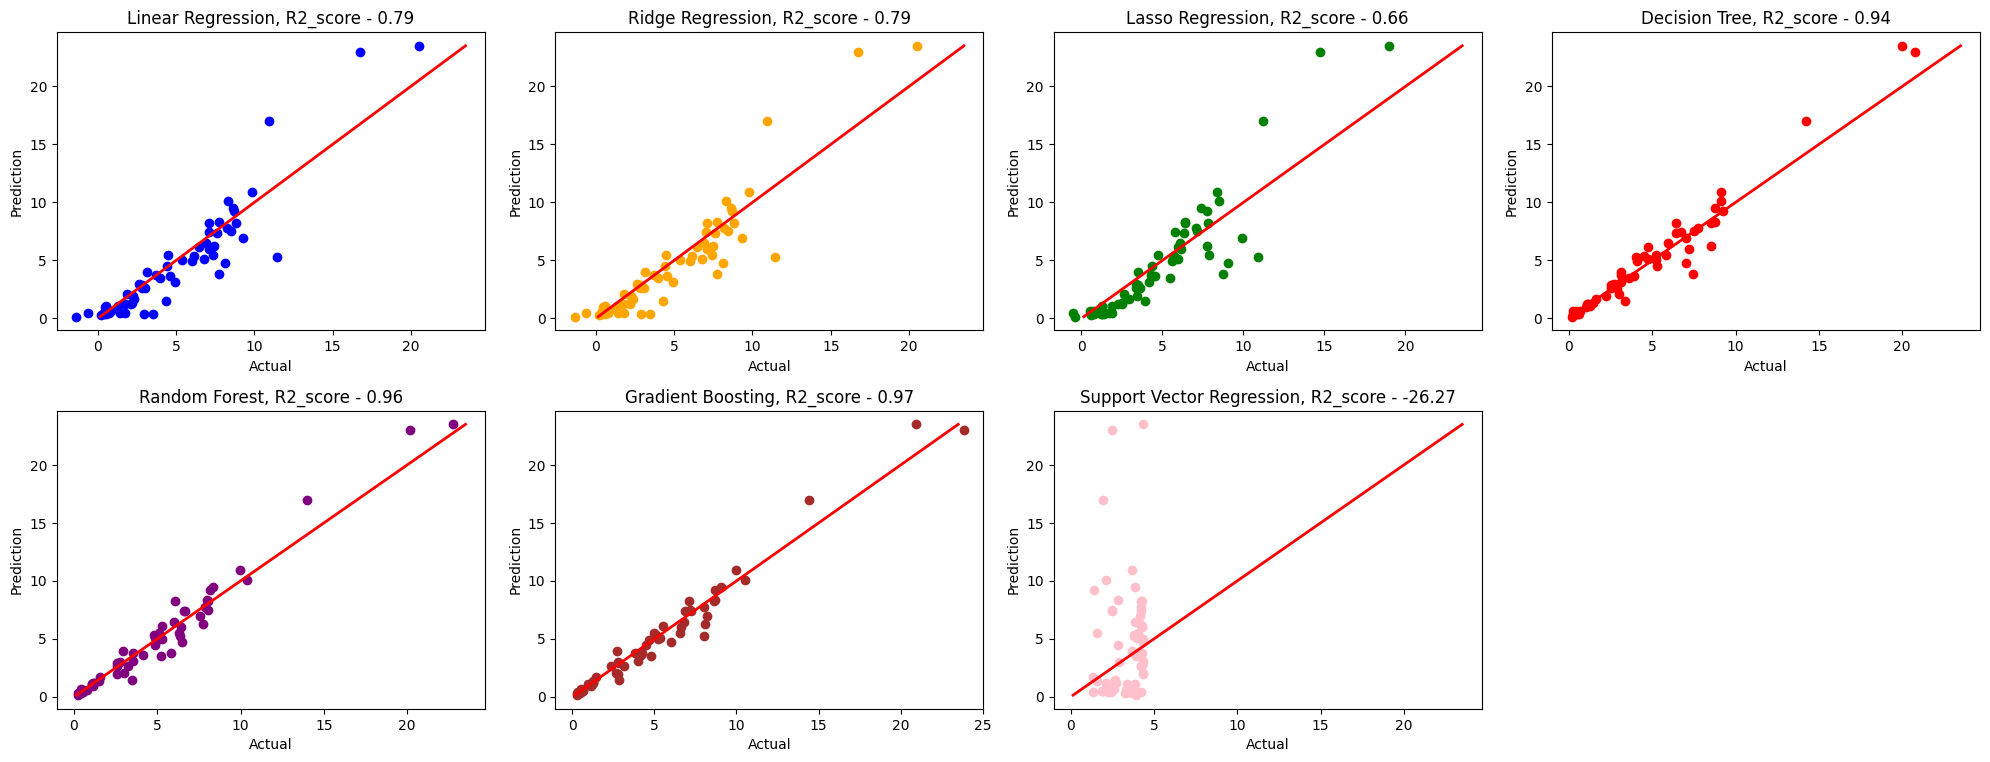

In [12]:
plt.figure(figsize=(20, 30))


for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    r2 = r2_score(y_pred, y_test)

    a = [[13	,2003	,8.54,	53000,	0	,0,	0	,1]]

    input_values.append(model.predict(a))
    names.append(name)
    results[name] = {
        'Mean absolute error': mae,
        'Mean square error': mse,
        'R2 score': r2
    }

    plt.subplot(8, 4, i)
    plt.scatter(y_pred, y_test, color=col[i-1])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f"{name}, R2_score - {r2:.2f}")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")

plt.tight_layout()
plt.show()

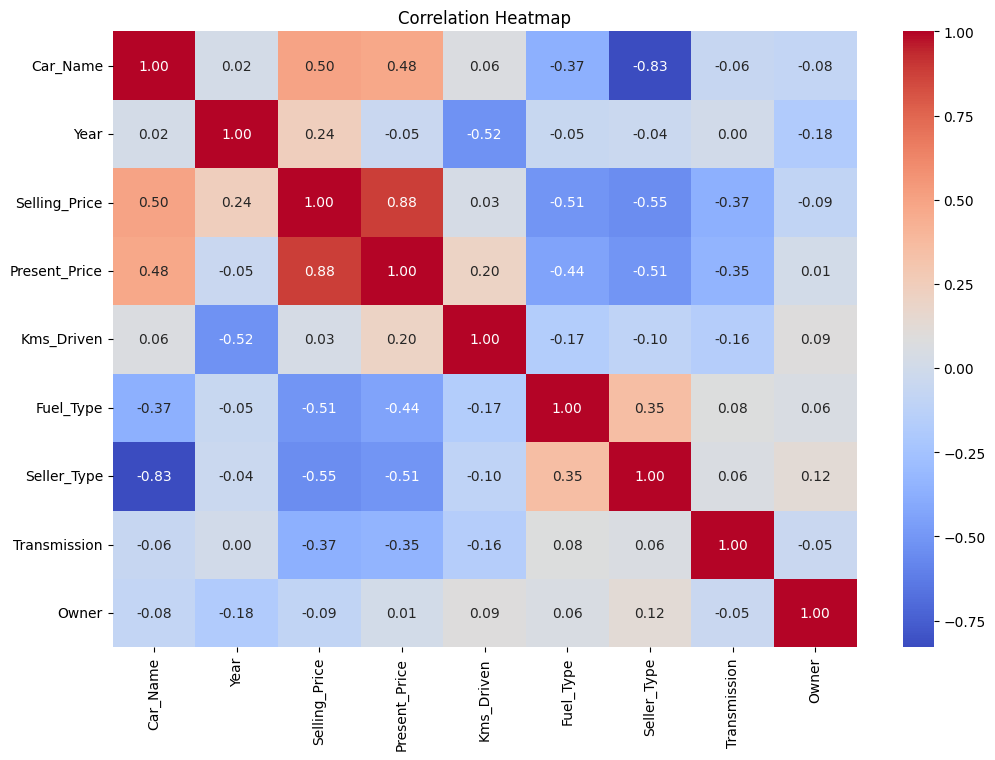

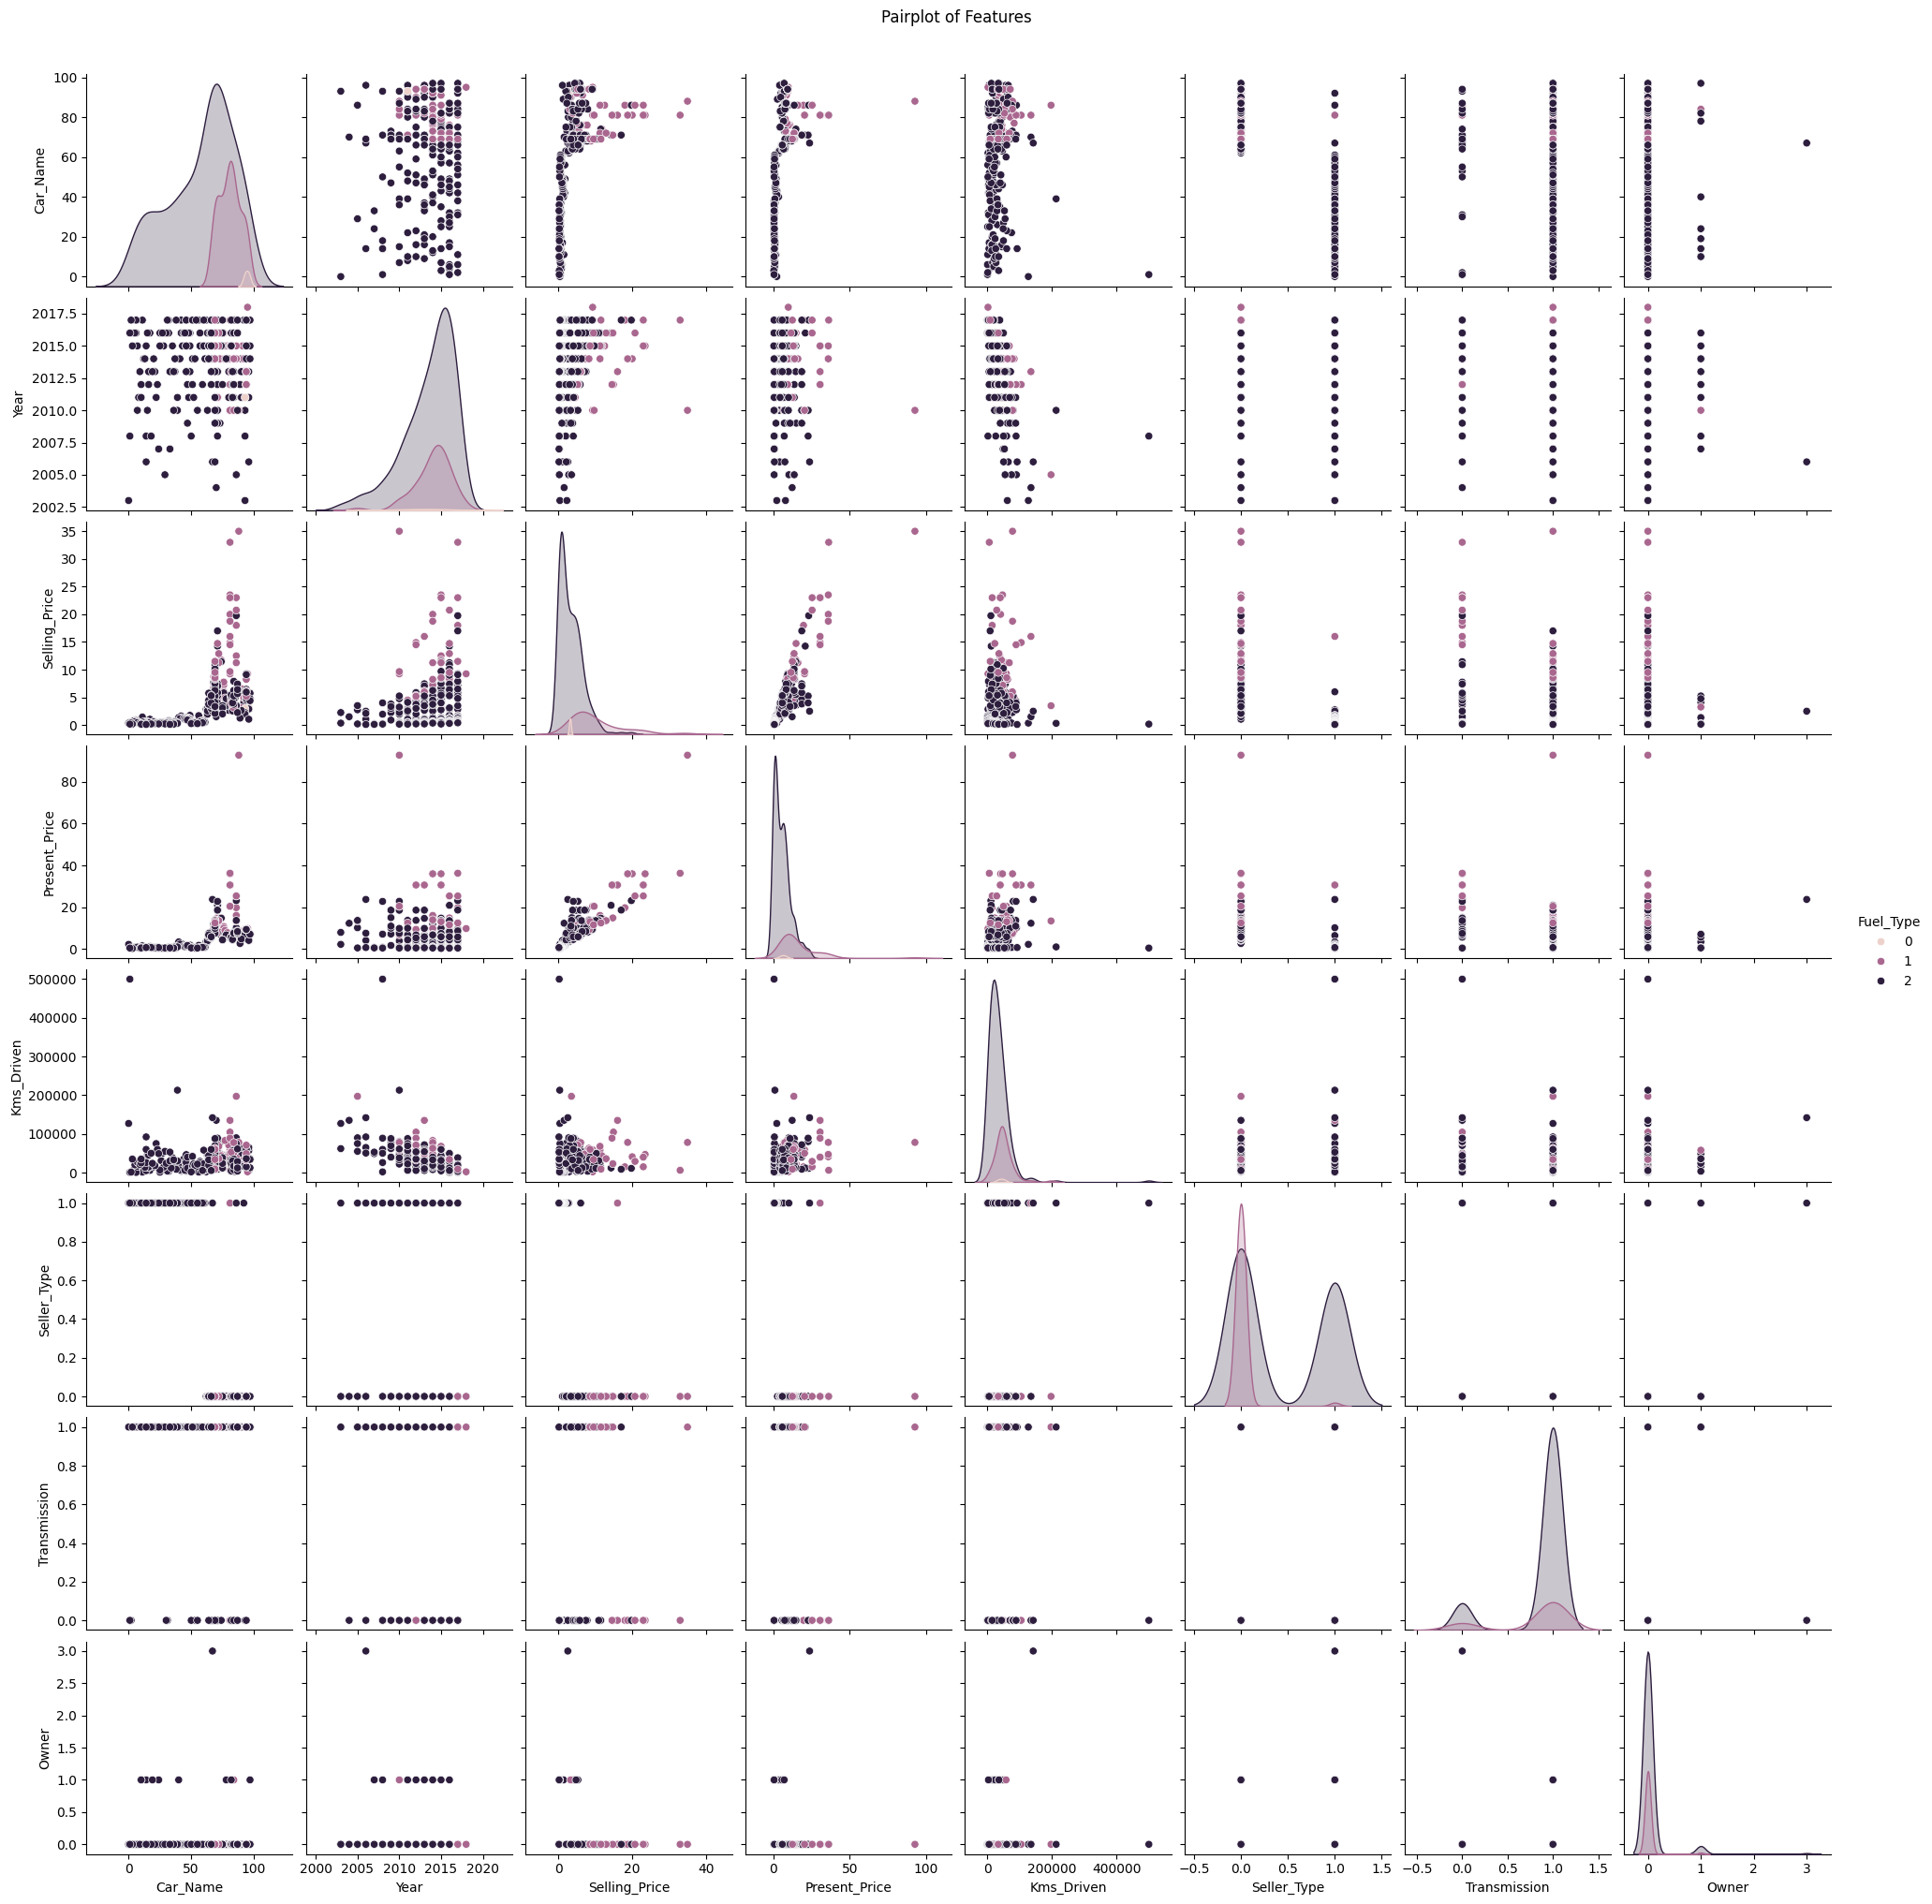

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde', hue='Fuel_Type')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [14]:
result_df = pd.DataFrame(results).T
values = pd.DataFrame(input_values).T
values.columns = names

print(result_df)
print(values)

                           Mean absolute error  Mean square error   R2 score
Linear Regression                     1.214234           3.534719   0.788457
Ridge Regression                      1.213021           3.517336   0.787799
Lasso Regression                      1.433865           4.523691   0.658913
Decision Tree                         0.663443           1.182605   0.935596
Random Forest                         0.602302           0.843456   0.956048
Gradient Boosting                     0.539823           0.691548   0.967151
Support Vector Regression             3.154526          25.229175 -26.273790
   Linear Regression  Ridge Regression  Lasso Regression  Decision Tree  \
0           4.752267          4.534525          1.184312            3.0   

   Random Forest  Gradient Boosting  Support Vector Regression  
0         3.5068            3.31022                   4.365555  
